In [1]:
import pandas as pd

In [2]:
result = pd.read_csv('./important_csvs/predictions_confidences_csvs/resnet2d-1frame.csv')

In [3]:
result

,exp,bur,fj,ande,fs,label,exp_conf,bur_conf,fj_conf,ande_conf,fs_conf
0,1.0,0.0,0.0,0.0,0.0,exp,0.027946,0.965892,0.052340,0.157125,0.001947
1,0.0,1.0,0.0,0.0,0.0,bur,0.563458,0.463297,0.019969,0.154279,0.008845
2,1.0,0.0,0.0,0.0,1.0,fs,0.995648,0.002351,0.003460,0.001136,1.000000
3,1.0,0.0,1.0,0.0,0.0,fj,0.949060,0.051367,0.237077,0.211320,0.005994
4,1.0,0.0,0.0,0.0,1.0,fs,0.994583,0.003114,0.003121,0.001790,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
6445,0.0,1.0,0.0,0.0,0.0,bur,0.470257,0.533308,0.032890,0.066200,0.008801
6446,0.0,1.0,0.0,0.0,0.0,bur,0.654321,0.376325,0.035499,0.103833,0.012833
6447,1.0,0.0,1.0,0.0,0.0,fj,0.290681,0.705267,0.148786,0.131232,0.005062
6448,1.0,0.0,0.0,0.0,1.0,fs,0.996533,0.001780,0.000960,0.000348,1.000000


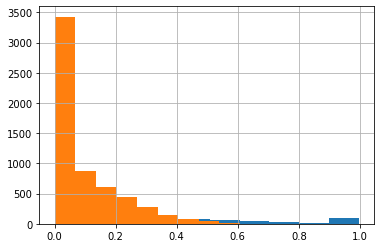

In [4]:
result.ande_conf[result.ande==1].hist()
result.ande_conf[result.ande==0].hist()

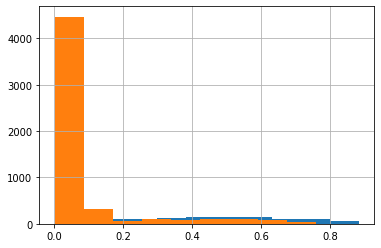

In [5]:
result.fj_conf[result.fj==1].hist()
result.fj_conf[result.fj==0].hist()

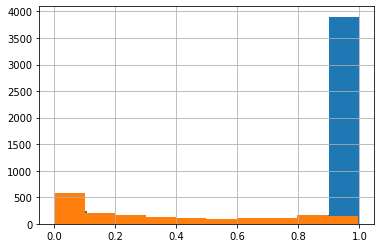

In [6]:
result.exp_conf[result.exp==1].hist()
result.exp_conf[result.exp==0].hist()

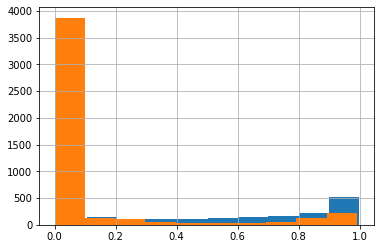

In [7]:
result.bur_conf[result.bur==1].hist()
result.bur_conf[result.bur==0].hist()

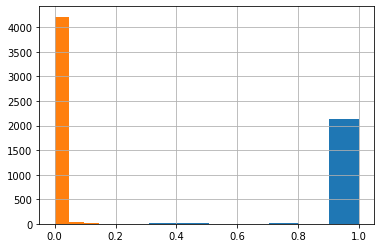

In [8]:
result.fs_conf[result.fs==1].hist()
result.fs_conf[result.fs==0].hist()

In [9]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
y_test = np.array(result.ande)
prob_pos = np.array(result.ande_conf)

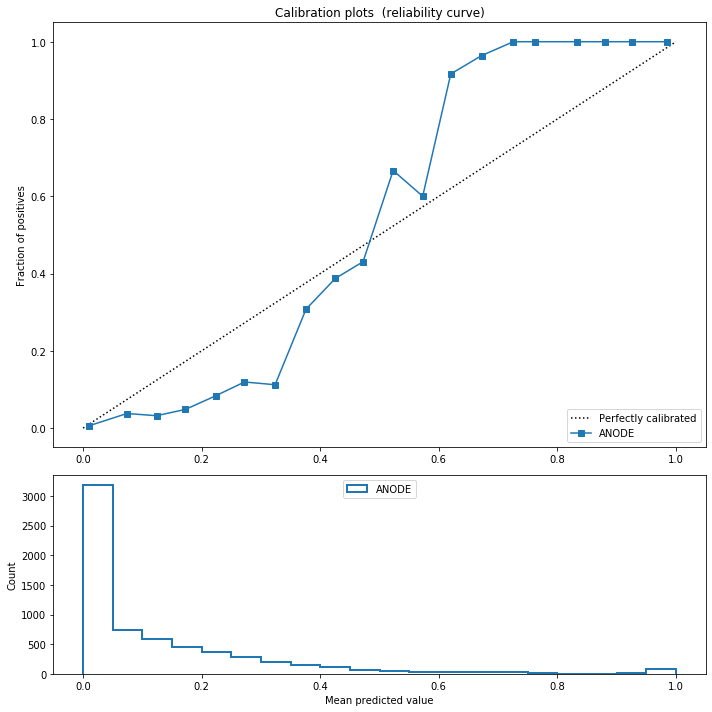

In [13]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

fraction_of_positives, mean_predicted_value =  calibration_curve(y_test, prob_pos, n_bins=20)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="ANODE")

ax2.hist(prob_pos, range=(0, 1), bins=20, label="ANODE",
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [14]:
g = mean_predicted_value

In [15]:
f = fraction_of_positives

In [16]:
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

In [17]:
idx

array([9])

In [18]:
g[idx]

array([0.47221584])

In [19]:
f[idx]

array([0.43055556])

In [20]:
y_test = np.array(result.fs)
prob_pos = np.array(result.fs_conf)

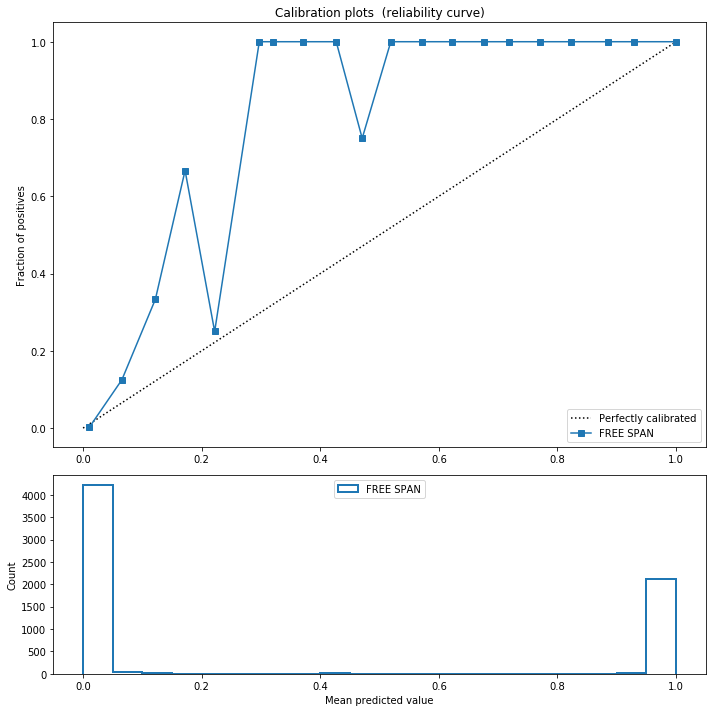

In [21]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

fraction_of_positives, mean_predicted_value =  calibration_curve(y_test, prob_pos, n_bins=20)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="FREE SPAN")

ax2.hist(prob_pos, range=(0, 1), bins=20, label="FREE SPAN",
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [22]:
g = mean_predicted_value

In [23]:
f = fraction_of_positives

In [24]:
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

In [25]:
idx

array([0])

In [26]:
g[idx]

array([0.01064874])

In [27]:
f[idx]

array([0.0023663])

In [28]:
y_test = np.array(result.bur)
prob_pos = np.array(result.bur_conf)

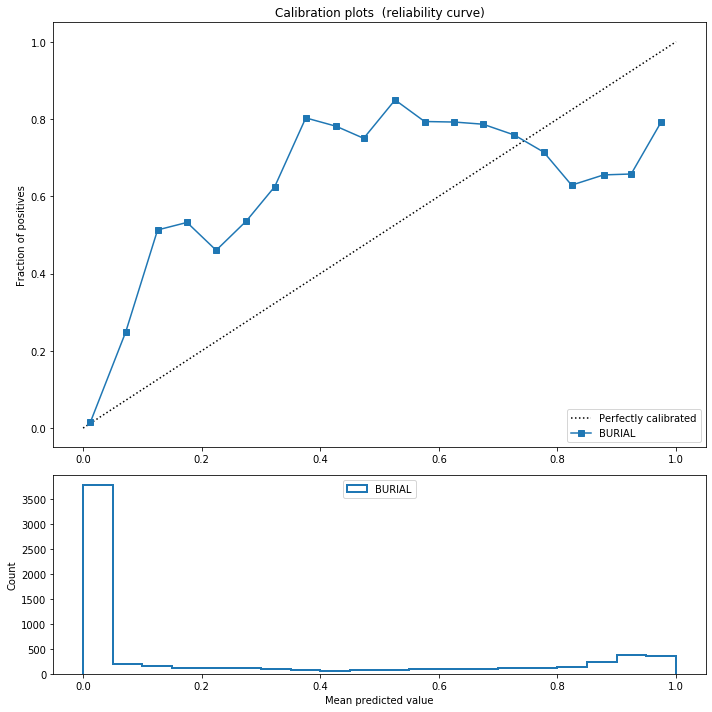

In [29]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

fraction_of_positives, mean_predicted_value =  calibration_curve(y_test, prob_pos, n_bins=20)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="BURIAL")

ax2.hist(prob_pos, range=(0, 1), bins=20, label="BURIAL",
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [30]:
g = mean_predicted_value

In [31]:
f = fraction_of_positives

In [32]:
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

In [33]:
idx

array([14])

In [34]:
g[idx]

array([0.72705657])

In [35]:
f[idx]

array([0.75862069])

In [36]:
y_test = np.array(result.exp)
prob_pos = np.array(result.exp_conf)

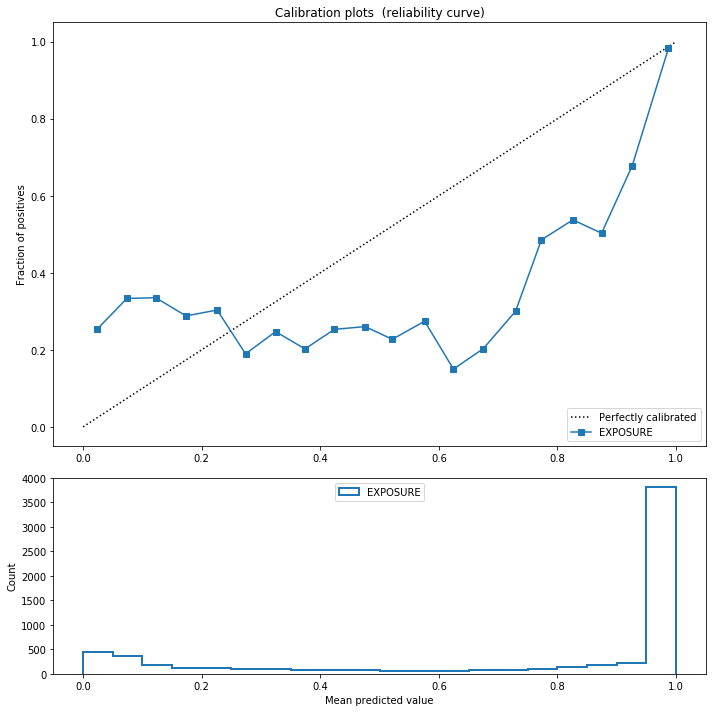

In [37]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

fraction_of_positives, mean_predicted_value =  calibration_curve(y_test, prob_pos, n_bins=20)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="EXPOSURE")

ax2.hist(prob_pos, range=(0, 1), bins=20, label="EXPOSURE",
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [38]:
g = mean_predicted_value

In [39]:
f = fraction_of_positives

In [40]:
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

In [41]:
idx

array([4])

In [42]:
g[idx]

array([0.22610141])

In [43]:
f[idx]

array([0.30327869])

In [44]:
y_test = np.array(result.fj)
prob_pos = np.array(result.fj_conf)

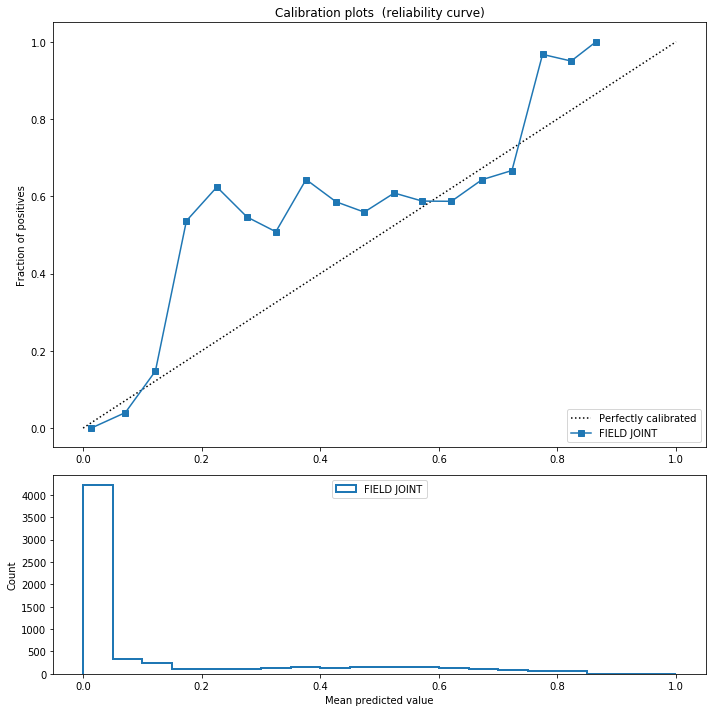

In [45]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

fraction_of_positives, mean_predicted_value =  calibration_curve(y_test, prob_pos, n_bins=20)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="FIELD JOINT")

ax2.hist(prob_pos, range=(0, 1), bins=20, label="FIELD JOINT",
         histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [46]:
g = mean_predicted_value

In [47]:
f = fraction_of_positives

In [48]:
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

In [49]:
idx

array([ 1, 11, 14])

In [50]:
g[idx]

array([0.07128244, 0.57202549, 0.7232327 ])

In [51]:
f[idx]

array([0.04012346, 0.5875    , 0.66666667])